In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("salary_data_cleard.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,Company_text,check_state,state1,python_yn,r_studio,spark,aws,excel
0,Data Scientist,$78K-$133K (Glassdoor est.),"Publishers Clearing House (PCH), located in Je...",3.3,Publishers Clearing House\r\n3.3,"Jericho, NY",-1,501 to 1000 Employees,1953,Company - Private,...,133,105.5,Publishers Clearing House\r\n,1,NY,1,0,0,1,1
1,Data Scientist,$78K-$133K (Glassdoor est.),Description\r\n\r\nJob Description:\r\n\r\nLei...,3.6,Leidos\r\n3.6,"McLean, VA",-1,10000+ Employees,1969,Company - Public,...,133,105.5,Leidos\r\n,1,VA,1,0,0,1,1
2,Senior Data Scientist Virtual Hiring Event,$78K-$133K (Glassdoor est.),The Zebra Hiring Event // Senior Data Scientis...,4.0,The Zebra\r\n4.0,"Austin, TX",-1,51 to 200 Employees,2012,Company - Private,...,133,105.5,The Zebra\r\n,1,TX,1,0,0,0,0
3,Data Scientist Virtual Hiring Event,$78K-$133K (Glassdoor est.),Orbis Operations Hiring Event!\r\n\r\nEvent De...,3.7,Orbis Operations\r\n3.7,"Fort Meade, MD",-1,201 to 500 Employees,-1,Company - Private,...,133,105.5,Orbis Operations\r\n,1,MD,1,0,0,0,0
4,Data Scientist Virtual Hiring Event,$78K-$133K (Glassdoor est.),LMI Hiring Event!\r\n\r\nEvent Details\r\nDate...,4.2,LMI\r\n4.2,"Baltimore, MD",-1,1001 to 5000 Employees,1961,Nonprofit Organization,...,133,105.5,LMI\r\n,1,MD,1,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'check_state', 'state1', 'python_yn', 'r_studio',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
#funtion to select the job title we need
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data science' in title.lower():
        return 'data scientist'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'NA'
    
#funtion to select seniortiy level
def seniortiy(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'

    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'NA'
    
    
def remove(string): 
    return string.replace(" ", "") 

In [6]:
df['job_simp'] =  df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist      813
NA                  155
machine learning     15
data analyst         12
manager               4
director              1
Name: job_simp, dtype: int64

In [8]:
df['seniortiy'] =  df['Job Title'].apply(seniortiy)
df.seniortiy.value_counts()

NA        865
senior    135
Name: seniortiy, dtype: int64

In [9]:
#job discreption length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2962
1      3678
2      4199
3      2781
4      2611
       ... 
995    2440
996    3059
997    4336
998    3817
999    2119
Name: desc_len, Length: 1000, dtype: int64

In [10]:
#convert competitor to str 
df['Competitors'] = df['Competitors'].astype(str)


In [11]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0 )
print(df['Competitors'].dtype)

object


In [12]:
df['Competitors']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
995    -1
996    -1
997    -1
998    -1
999    -1
Name: Competitors, Length: 1000, dtype: object

In [13]:
#hourly wage to annual
#if needed we must check if there is any job put its salary in hourly way if not skip this

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,78,133
1,0,78,133
2,0,78,133
3,0,78,133
4,0,78,133
...,...,...,...
995,0,86,128
996,0,86,128
997,0,86,128
998,0,86,128


In [14]:
df['Company_text']

0      Publishers Clearing House\r\n
1                         Leidos\r\n
2                      The Zebra\r\n
3               Orbis Operations\r\n
4                            LMI\r\n
                   ...              
995              Quibi - Los Angeles
996                   Trace Data\r\n
997                  Peoplevisor LLC
998               Infinitive Inc\r\n
999                    JumpStart\r\n
Name: Company_text, Length: 1000, dtype: object

In [15]:
df['Company_text'] = df.Company_text.apply(lambda x: x.replace('\r\n',''))
df['Company_text']

0      Publishers Clearing House
1                         Leidos
2                      The Zebra
3               Orbis Operations
4                            LMI
                 ...            
995          Quibi - Los Angeles
996                   Trace Data
997              Peoplevisor LLC
998               Infinitive Inc
999                    JumpStart
Name: Company_text, Length: 1000, dtype: object

In [16]:
df.describe()

,Rating,Headquarters,Founded,hourly,employer salary,min_salary,max_salary,avg_salary,check_state,python_yn,r_studio,spark,aws,excel,desc_len,num_comp
count,1000.000000,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,3.421700,-1.0,1605.883000,0.0,0.0,88.285000,141.322000,114.803500,0.925000,0.778000,0.006000,0.272000,0.290000,0.429000,3583.589000,0.0
std,1.495164,0.0,781.926198,0.0,0.0,17.923421,27.331874,22.199064,0.263523,0.415799,0.077266,0.445213,0.453989,0.495181,1695.004766,0.0
min,-1.000000,-1.0,-1.000000,0.0,0.0,49.000000,85.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.0
25%,3.300000,-1.0,1914.000000,0.0,0.0,85.000000,128.000000,105.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2428.750000,0.0
50%,3.800000,-1.0,1993.000000,0.0,0.0,86.000000,137.000000,111.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3379.000000,0.0
75%,4.200000,-1.0,2007.000000,0.0,0.0,101.000000,160.500000,130.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4477.000000,0.0
max,5.000000,-1.0,2019.000000,0.0,0.0,131.000000,207.000000,169.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14527.000000,0.0


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'check_state', 'state1', 'python_yn', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniortiy', 'desc_len',
       'num_comp'],
      dtype='object')

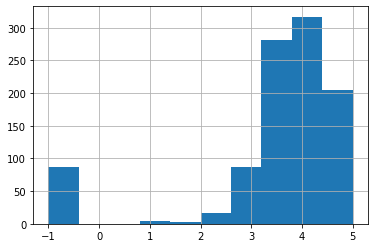

In [18]:
df.Rating.hist()

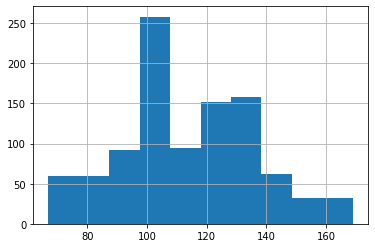

In [19]:
df.avg_salary.hist()

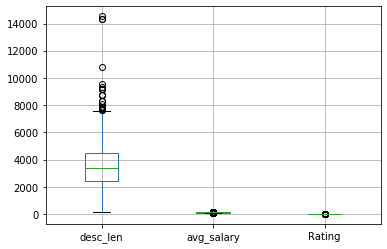

In [20]:
df.boxplot(column = ['desc_len','avg_salary','Rating'])

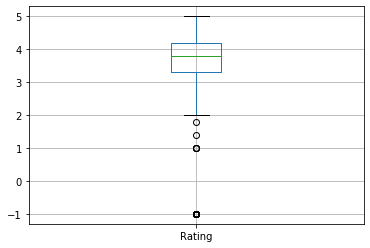

In [21]:
df.boxplot(column = 'Rating')

In [22]:
df[['desc_len','avg_salary','Rating']].corr()

,desc_len,avg_salary,Rating
desc_len,1.000000,0.071073,0.078437
avg_salary,0.071073,1.000000,0.065733
Rating,0.078437,0.065733,1.000000


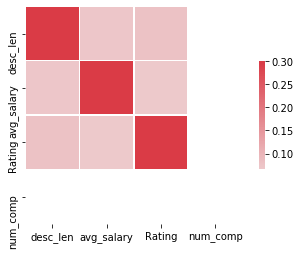

In [23]:
cmap =sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['desc_len','avg_salary','Rating','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5 , cbar_kws={"shrink":.5})

In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'check_state', 'state1', 'python_yn', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniortiy', 'desc_len',
       'num_comp'],
      dtype='object')

In [25]:
df_cat = df[['Location', 'Size',
    'Type of ownership', 'Industry', 'Sector', 'Revenue','Company_text','state1','check_state']]

Graph for Location: total = 232


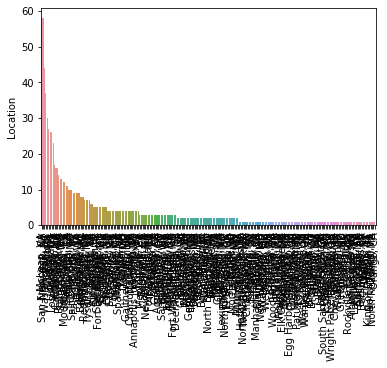

Graph for Size: total = 9


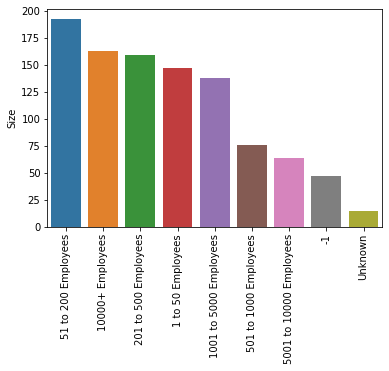

Graph for Type of ownership: total = 13


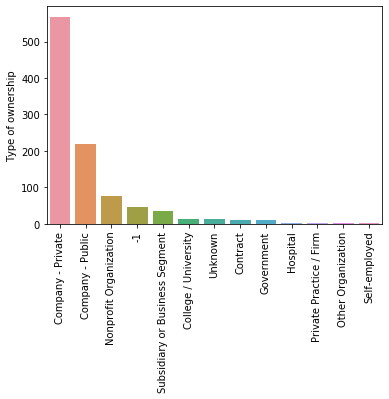

Graph for Industry: total = 63


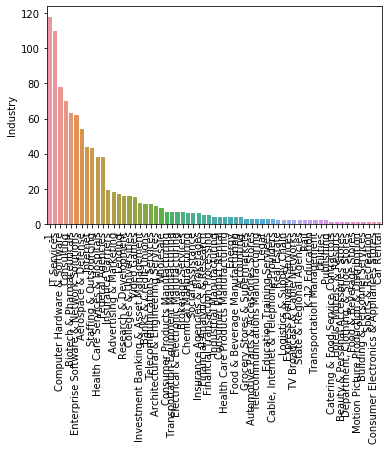

Graph for Sector: total = 23


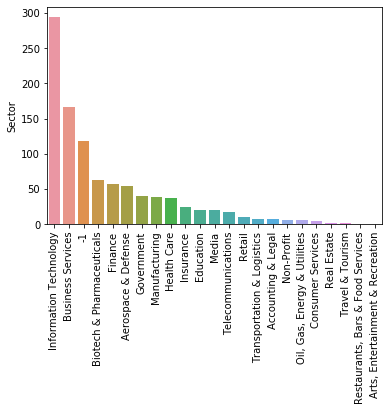

Graph for Revenue: total = 14


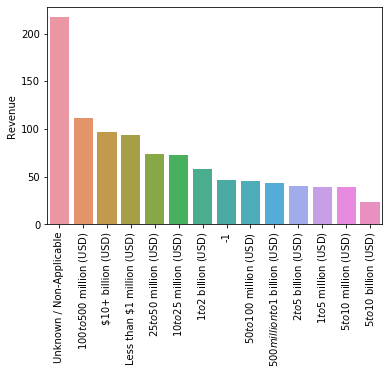

Graph for Company_text: total = 590


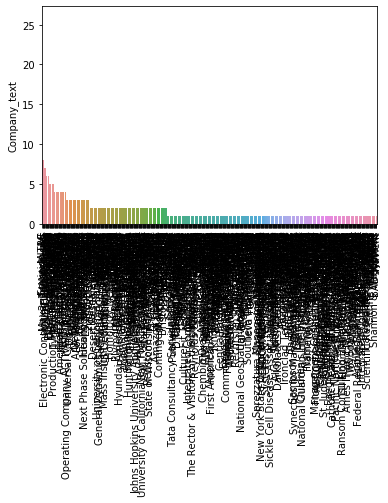

Graph for state1: total = 43


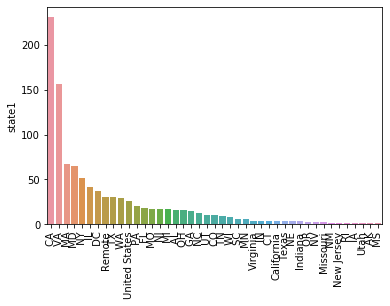

Graph for check_state: total = 2


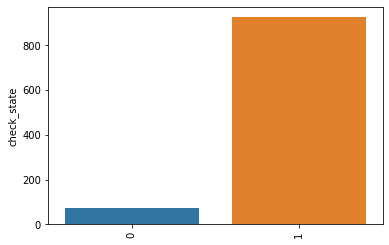

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart =sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Company_text: total = 20


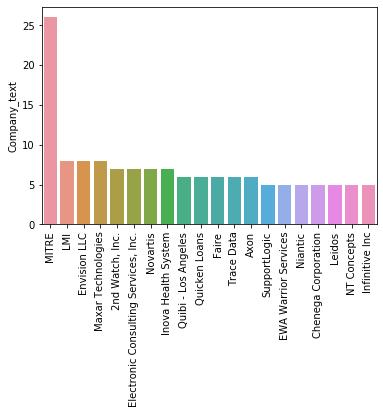

Graph for Location: total = 20


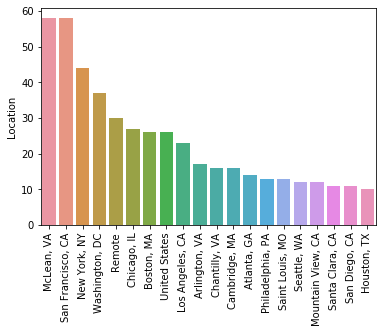

In [27]:
for i in df_cat[['Company_text','Location',]].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart =sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'check_state', 'state1', 'python_yn', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniortiy', 'desc_len',
       'num_comp'],
      dtype='object')

In [29]:
pd.pivot_table(df, index = 'job_simp', values='avg_salary')

,avg_salary
job_simp,
NA,117.670968
data analyst,105.958333
data scientist,114.651907
director,67.000000
machine learning,103.066667
manager,117.000000


In [30]:
pd.options.display.max_rows
pd.pivot_table(df, index = ['state1','job_simp'], values='avg_salary', aggfunc= 'count').sort_values('state1', ascending =False)

avg_salary
state1        job_simp                    
Virginia      NA                         4
Utah          data scientist             1
United States data scientist            10
              data analyst               1
              NA                        15
...                                    ...
 CA           NA                        16
              machine learning           3
 AL           data scientist            13
              NA                         3
 AK           NA                         1

[80 rows x 1 columns]

In [31]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'state1', values='avg_salary').sort_values('avg_salary', ascending =False)

,avg_salary
state1,
New Jersey,157.500000
IN,144.750000
Remote,126.981481
NE,124.333333
UT,123.785714
CO,121.250000
AL,120.653846
MA,120.057692
RI,119.500000


In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'check_state', 'state1', 'python_yn', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniortiy', 'desc_len',
       'num_comp'],
      dtype='object')

In [33]:
#'Rating','Industry','Sector','Revenue', 'Competitors','Type of ownership','hourly','python_yn','r_studio','spark', 'aws', 'excel','desc_len',

In [34]:
df_pivots=df[['Rating','Industry','Sector','Revenue', 'Competitors','Type of ownership','hourly','python_yn','r_studio','spark', 'aws', 'excel','desc_len','avg_salary']]

In [36]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values ='avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.0    139.333333
 2.2    137.250000
 1.8    130.500000
 4.1    120.684211
 4.7    120.096154
 4.5    120.035714
 4.8    119.423077
 3.6    119.271739
 4.0    118.078125
 4.3    117.983333
 4.4    117.935897
 3.9    117.173333
 2.7    116.000000
 3.4    115.842105
 2.6    115.100000
 4.6    115.022727
 3.5    114.490741
 3.3    114.375000
 3.8    114.298507
 5.0    113.872549
 3.7    113.308333
 3.0    112.660000
 2.5    111.812500
-1.0    111.040230
 2.4    111.000000
 3.2    110.971429
 2.9    107.805556
 4.2    107.697674
 3.1    107.557692
 1.0    107.000000
 1.4    105.500000
 4.9    104.083333
 2.8    102.428571
Industry
                                          avg_salary
Industry                                            
Utilities                                 144.750000
Energy                                    139.250000
Brokerage Services                        138.857143
Investment Banking & Asset Management     136.541667
M

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [37]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn' , values = 'avg_salary', aggfunc ='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),14,44
$1 to $5 million (USD),5,34
$10 to $25 million (USD),23,50
$10+ billion (USD),18,79
$100 to $500 million (USD),26,85
$2 to $5 billion (USD),4,36
$25 to $50 million (USD),16,58
$5 to $10 billion (USD),8,15
$5 to $10 million (USD),13,26


In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk  
nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


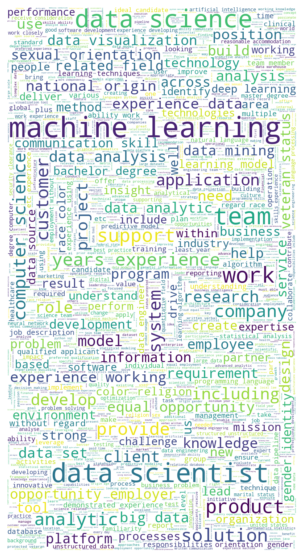

In [57]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000,width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()
